In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
n = 3 # degree of polynomial
ey = (0,30,60,90,120,150,180,210,240,270,300,330,360) #L_s array
ey2 = (0,61.2,126.6,193.3,257.8,317.5,371.9,421.6,468.5,514.6,562.0,612.9,668.6) #Sol array
eyf = np.polyfit(ey,ey2,n) #polynomial fit in third degree

In [66]:
print(eyf)

[  3.02706553e-06  -2.80894106e-03   2.48058233e+00  -6.31401099e+00]


In [67]:
ls = np.arange(0,360,1) # regular grid of Ls values
sol = np.polyval(eyf, ls) # use polynomial function to find sol values

(Text(0.5,0,'$\\mathrm{L_s}$'), Text(0,0.5,'Sol'))

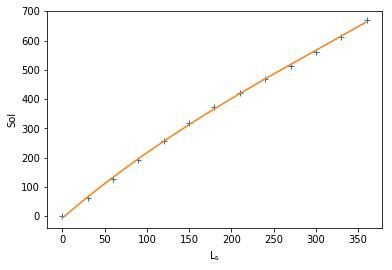

In [68]:
plt.plot(ey, ey2, '+')
plt.plot(ls, sol, '-')
plt.xlabel('$\mathrm{L_s}$'), plt.ylabel('Sol')

(Text(0.5,0,'$\\mathrm{L_s}$'), Text(0,0.5,'$\\Delta(\\mathrm{Sol})$ Error'))

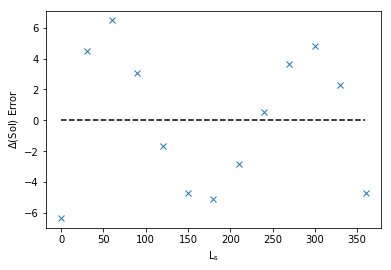

In [69]:
# Plot difference between fit and data
plt.plot(ey, np.polyval(eyf, ey)-ey2, 'x')
plt.plot(ls, ls*0, '--k')
plt.xlabel('$\mathrm{L_s}$'), plt.ylabel('$\Delta(\mathrm{Sol})$ Error')

In [70]:
# Function: ls2sol
# Purpose: convert Mars "Lsubs" to sol (day of year)
# Input: 
#    ls = areocentric longitude of the Sun [array]
#    n = degree of polynomial fit [scalar]
def ls2sol(ls, n):
    # data
    lsdata = (0,30,60,90,120,150,180,210,240,270,300,330,360) # L_s array
    soldata = (0,61.2,126.6,193.3,257.8,317.5,371.9,421.6,468.5,514.6,562.0,612.9,668.6) # Sol array
    
    # polynomial fit
    p = np.polyfit(lsdata, soldata, n)
    
    # sol for Ls input
    sol = np.polyval(p, ls)
    
    # return result
    return sol
    

n = 3, max. error = 6.46,           RMS error = 1.18
n = 4, max. error = 1.51,           RMS error = 0.25
n = 5, max. error = 0.60,           RMS error = 0.07
n = 6, max. error = 0.23,           RMS error = 0.04
n = 7, max. error = 0.09,           RMS error = 0.01
n = 8, max. error = 0.03,           RMS error = 0.01


(Text(0.5,0,'$\\mathrm{L_s}$'), Text(0,0.5,'$\\Delta(\\mathrm{Sol})$ Error'))

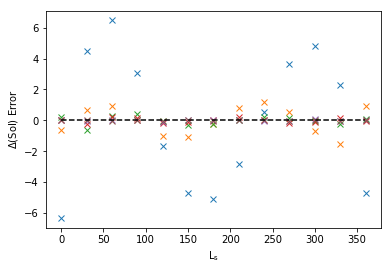

In [84]:
# Test to find minimum n-value
for n in np.arange(3,8.01,1):
    sol = ls2sol(ey, n)
    plt.plot(ey, sol-ey2, 'x') # Difference of fit from data
    # print RMS and max. error
    print('n = {:d}, max. error = {:.2f}, \
          RMS error = {:.2f}'.format(np.int(n), \
                                     np.max(np.abs(sol-ey2)), \
                                     np.sqrt(np.sum( (sol-ey2)**2 ))/np.size(sol) ) )

plt.plot(ls, ls*0, '--k')
plt.xlabel('$\mathrm{L_s}$'), plt.ylabel('$\Delta(\mathrm{Sol})$ Error')